(3731, 4)


,string_X_train,Y_label,string_Y_1,string_Y_2
16,SIGNED COMMERCIAL INVOICE IN 3 ORIGINALS INDI...,CTBC BANK CO LTD,1861,1877
18,SIGNED COMMERCIAL INVOICE IN TRIPLICATE FULL ...,INDUSTRIAL BANK OF KOREA SEOUL,875,905
19,SIGNED COMMERCIAL INVOICE IN TRIPLICATE FULL ...,INDUSTRIAL BANK OF KOREA SEOUL,875,905
22,SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICA...,CTBC BANK CO LTD,4925,4941
23,SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICA...,CTBC BANK CO LTD,4925,4941


(2984, 4)
(747, 4)


Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should pr


epoch:0 train_loss:0.7628352005755709 val_loss:0.4158151533694998
save best_model now_val_best_loss is:0.4158151533694998



epoch:1 train_loss:0.3631849379631721 val_loss:0.21629207823625815
save best_model now_val_best_loss is:0.21629207823625815



epoch:2 train_loss:0.20412345749941924 val_loss:0.22101590896065357



epoch:3 train_loss:0.12192201057992098 val_loss:0.22761142702763199



epoch:4 train_loss:0.12049916481855787 val_loss:0.2025579706895896
save best_model now_val_best_loss is:0.2025579706895896



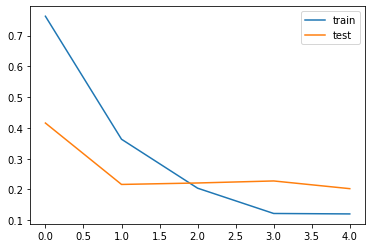

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.849905,0.717537,0.761714,0.899598,0.94913


,Y_label,predict,是否全對
7209,KEB HANA BANK,KEB HANA BANK,Yes
19459,CHINA CITIC BANK,SERVICECHINA CITIC BANK,No
7585,SHINHAN BANK,SHINHAN BANK,Yes
15330,MUFG BANK LTD,MUFG BANK LTD,Yes
1644,CTBC BANK CO LTD,CTBC BANK CO LTD,Yes
...,...,...,...
5404,NONGHYUP BANK,NONGHYUP BANK,Yes
15244,BANK OF BARODA,OFBANK OF BARODADUBAI,No
15834,INDUSTRIAL BANK OF KOREA SEOUL,INDUSTRIAL BANK OF KOREA SEOUL,Yes
934,OCBC WING HANG BANK CHINA LIMITED,OCBC WING HANG BANK CHINA LIMITEDMARKED,No


In [2]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_銀行.csv',index_col=0)[['string_X_train','Y_label','string_Y_1','string_Y_2']]
print(df.shape)
display(df.head())
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print(train_df.shape)
print(val_df.shape)
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/0ac62d4a6efe4b7f9cc58ff8ff614aca7603fa25/bert_train_pipeline.py'
exec(requests.get(url).text)
res,table = bert_train_pipeline(train_df,val_df,
                                qustion = 'What is the bank name?',
                                model_path = '../models/Product_Data_SQuAD_model_銀行.pt',
                                max_epochs = 5,
                                )
display(res)
display(table)